In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg


In [2]:
path = "C:/Users/hp.pc/Python/dataset"
classes = os.listdir(path)
classes

['cats', 'dogs']

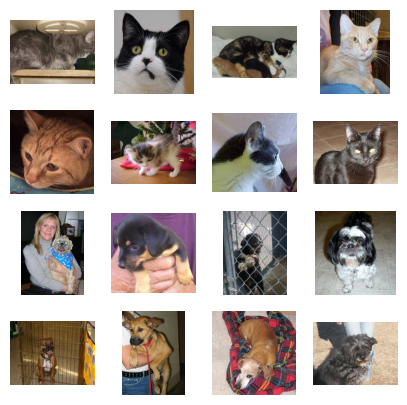

In [3]:
fig = plt.gcf()
fig.set_size_inches(5, 5)

cat_dir = os.path.join('C:/Users/hp.pc/Python/dataset/cats')
dog_dir = os.path.join('C:/Users/hp.pc/Python/dataset/dogs')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
			for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
			for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
	sp = plt.subplot(4, 4, i+1)
	sp.axis('Off')

	img = mpimg.imread(img_path)
	plt.imshow(img)

plt.show()


In [4]:
base_dir = 'C:/Users/hp.pc/Python/dataset'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
												image_size=(100,100),
												subset='training',
												seed = 1,
												validation_split=0.25,
												batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
												image_size=(100,100),
												subset='validation',
												seed = 1,
												validation_split=0.25,
												batch_size= 32)


Found 8005 files belonging to 2 classes.
Using 6004 files for training.
Found 8005 files belonging to 2 classes.
Using 2001 files for validation.


In [5]:
model = tf.keras.models.Sequential([
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(128, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(128, activation='relu'),
	layers.Dropout(0.1),
	layers.BatchNormalization(),
	layers.Dense(128, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(1, activation='sigmoid')
])


In [6]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 64)        0

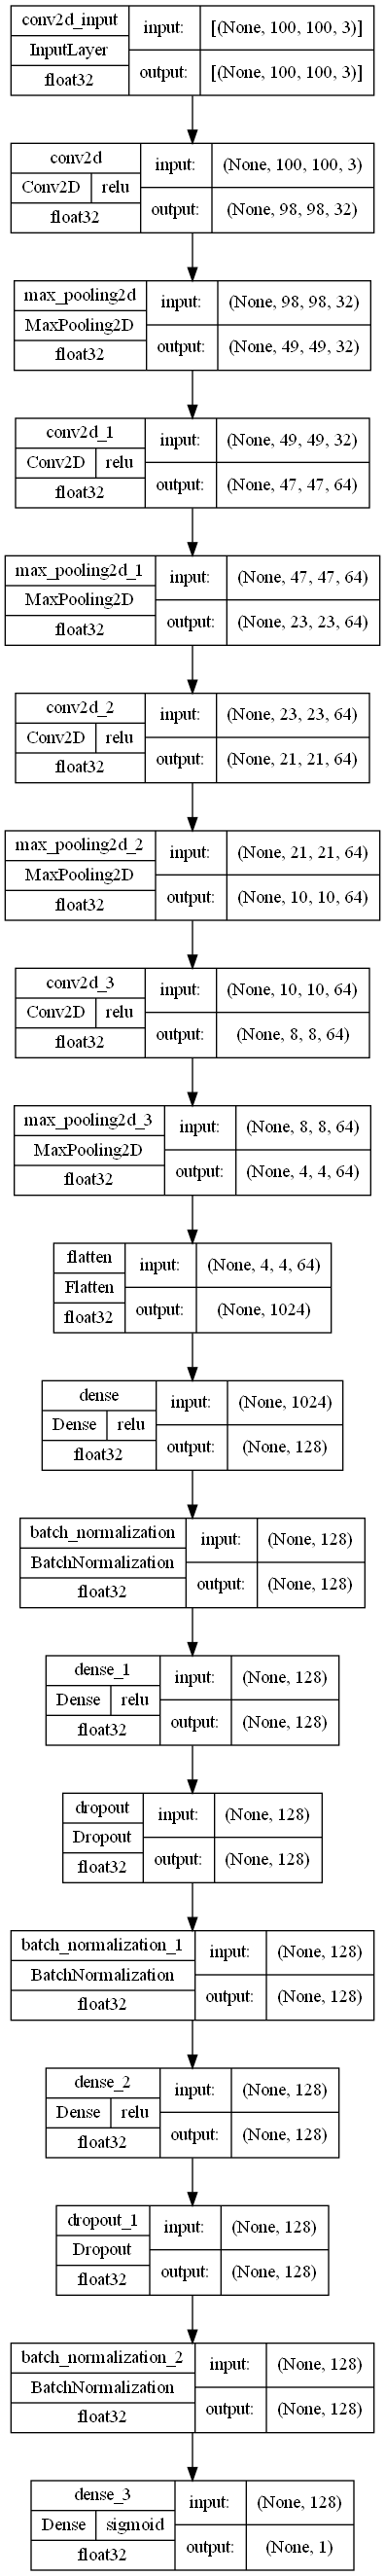

In [7]:
keras.utils.plot_model(
	model,
	show_shapes=True,
	show_dtype=True,
	show_layer_activations=True
)


In [8]:
model.compile(
	loss='binary_crossentropy',
	optimizer='adam',
	metrics=['accuracy']
)


In [9]:
history = model.fit(train_datagen,
		epochs=10,
		validation_data=test_datagen) 

Epoch 1/10
188/188 [==============================] - 111s 553ms/step - loss: 0.7683 - accuracy: 0.5483 - val_loss: 0.6786 - val_accuracy: 0.6127
Epoch 2/10
188/188 [==============================] - 104s 552ms/step - loss: 0.6865 - accuracy: 0.5889 - val_loss: 1.3504 - val_accuracy: 0.4988
Epoch 3/10
188/188 [==============================] - 104s 551ms/step - loss: 0.6949 - accuracy: 0.5741 - val_loss: 4.5273 - val_accuracy: 0.4983
Epoch 4/10
188/188 [==============================] - 104s 552ms/step - loss: 0.6650 - accuracy: 0.6086 - val_loss: 0.8833 - val_accuracy: 0.5182
Epoch 5/10
188/188 [==============================] - 104s 553ms/step - loss: 0.6380 - accuracy: 0.6367 - val_loss: 0.7936 - val_accuracy: 0.5452
Epoch 6/10
188/188 [==============================] - 104s 553ms/step - loss: 0.6205 - accuracy: 0.6617 - val_loss: 1.5957 - val_accuracy: 0.4998
Epoch 7/10
188/188 [==============================] - 105s 554ms/step - loss: 0.5941 - accuracy: 0.6904 - val_loss: 0.7132 -

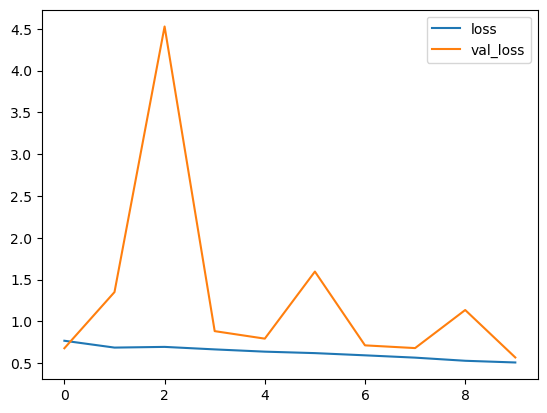

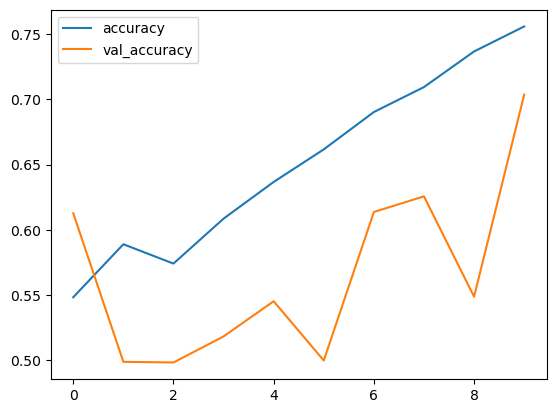

In [10]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show() 

1/1 [==============================] - 0s 64ms/step
Cat


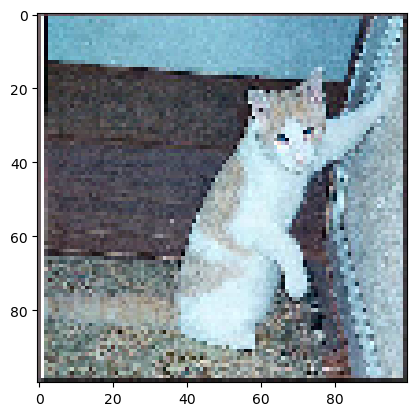

In [24]:
from keras.preprocessing import image

#Input image
test_image = image.load_img('C:/Users/hp.pc/Python/test_set/cats/cat.4001.jpg',target_size=(100,100))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)


#Mapping result array with the main name list

if result >= 0.5:
    print("Cat")
else:
    print("Dog")


1/1 [==============================] - 0s 47ms/step
Dog


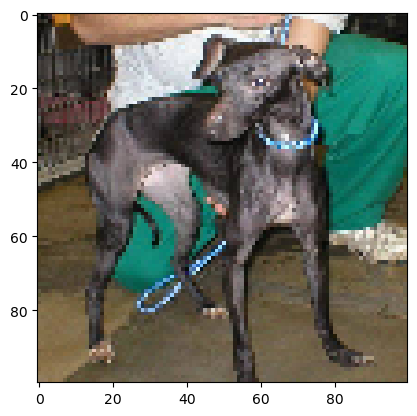

In [16]:
test_image = image.load_img('C:/Users/hp.pc/Python/test_set/dogs/dog.4004.jpg', target_size=(100, 100))

# For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Result array
result = model.predict(test_image)
# Mapping result array with the main name list

if result >= 0.8:
    print("Dog")
else:
    print("Cat")
